# Итоговая работа

## Загрузите файл HR.csv в pandas dataframe

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [37]:
df = pd.read_csv("HR.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [38]:
# общий расчет для всей таблицы
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [39]:
# расчет дополнительных метрик

metrics = ['satisfaction_level', 'last_evaluation', 'number_project',
           'average_montly_hours', 'time_spend_company']
for stats in metrics:
    print("Базовые метрики для", stats)
    r = df[stats].max() - df[stats].min()
    print("Размах ", str(r))
    print("Мода ", df[stats].mode()[0])
    print("Медиана ", df[stats].median())
    print("Дисперсия ", df[stats].var())
    print("Метод describe \n", df[stats].describe())
    print("----------")

Базовые метрики для satisfaction_level
Размах  0.91
Мода  0.1
Медиана  0.64
Дисперсия  0.06181720064708763
Метод describe 
 count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64
----------
Базовые метрики для last_evaluation
Размах  0.64
Мода  0.55
Медиана  0.72
Дисперсия  0.02929886443156307
Метод describe 
 count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64
----------
Базовые метрики для number_project
Размах  5
Мода  4
Медиана  4.0
Дисперсия  1.519283914389243
Метод describe 
 count    14999.000000
mean         3.803054
std          1.232592
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: number_

## Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
## Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [40]:
df.corr()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


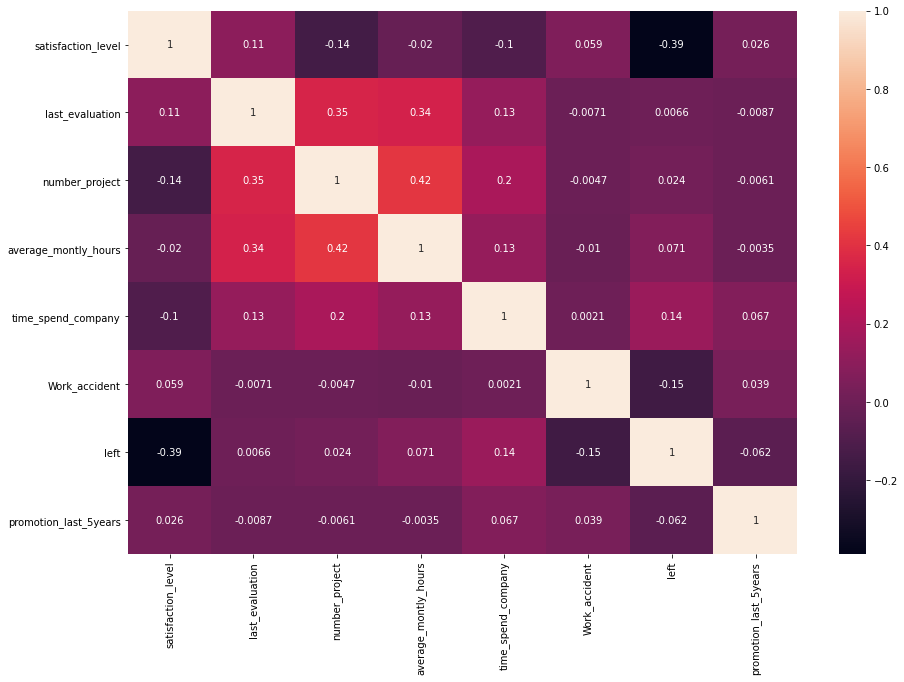

In [41]:
sns.heatmap(df.corr(), annot=True)
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()


Самые скореллированные переменные average_monthly_hours и number_projects, что показывает зависимость
затрачиваемого времени от количества проектов.
Наименеескоррелированные переменные - left и satisfaction_level. Увольняются люди с наименьшим уровнем
удовлетворенности работой.

## Рассчитайте сколько сотрудников работает в каждом департаменте.

In [42]:
personal = df[df['left']==0]
print(f"На данный момент таблица работающего персонала:\n{personal.department.value_counts()}")


На данный момент таблица работающего персонала:
sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: department, dtype: int64


## Показать распределение сотрудников по зарплатам.

На данный момент таблица зарплат работающего персонала:
low       5144
medium    5129
high      1155
Name: salary, dtype: int64


<AxesSubplot:>

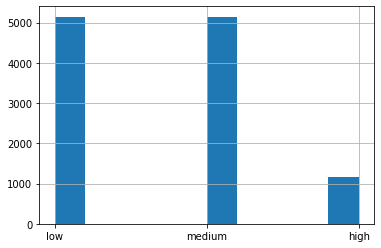

In [43]:
print(f"На данный момент таблица зарплат работающего персонала:\n{personal.salary.value_counts()}")
personal.salary.hist()

## Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [44]:
print(f"Зарплата по департаментам: \n{personal.groupby('department')['salary'].value_counts()}")

Зарплата по департаментам: 
department   salary
IT           medium     438
             low        437
             high        79
RandD        medium     310
             low        309
             high        47
accounting   low        259
             medium     235
             high        69
hr           low        243
             medium     242
             high        39
management   high       224
             medium     194
             low        121
marketing    medium     308
             low        276
             high        71
product_mng  low        346
             medium     296
             high        62
sales        medium    1469
             low       1402
             high       255
support      medium     784
             low        757
             high       133
technical    low        994
             medium     853
             high       176
Name: salary, dtype: int64


Text(0, 0.5, 'Количество сотрудников')

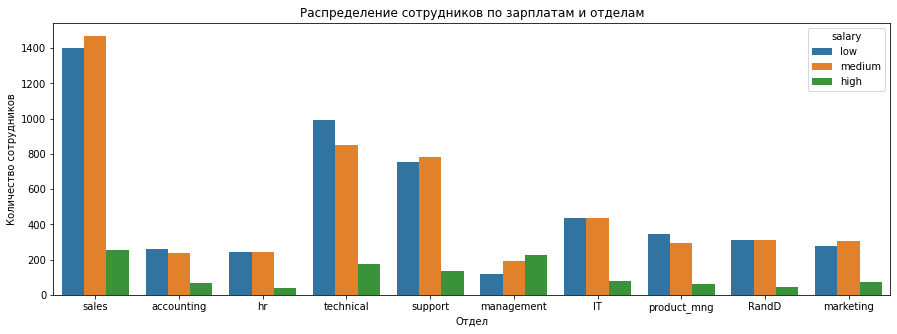

In [45]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'department', hue = 'salary', data = personal)
plt.title('Распределение сотрудников по зарплатам и отделам')
plt.xlabel('Отдел')
plt.ylabel('Количество сотрудников')

## Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [46]:
# 5%
level = 0.05

high_low = st.ttest_ind(personal[personal['salary'] == 'high']['average_montly_hours'],
                           personal[personal['salary'] == 'low']['average_montly_hours'], equal_var=False)
print(high_low)
if high_low.pvalue < level:
    print('Не верно. Сотрудники с высоким окладом проводят на работе меньше времени, чем сотрудники с низким окладом')
else:
    print('Верно. С уверенностью 95% можем сказать, что сотрудники с высоким окладом проводят на работе больше времени, '
          'чем сотрудники с низким окладом')

Ttest_indResult(statistic=1.1462438413562088, pvalue=0.25185710427140806)
Верно. С уверенностью 95% можем сказать, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
